<br>
I tried to implement one of the relatively new distance metrics, Hassanat, in two datasets and compare it with the Minkowski distance result.<br>
<br>

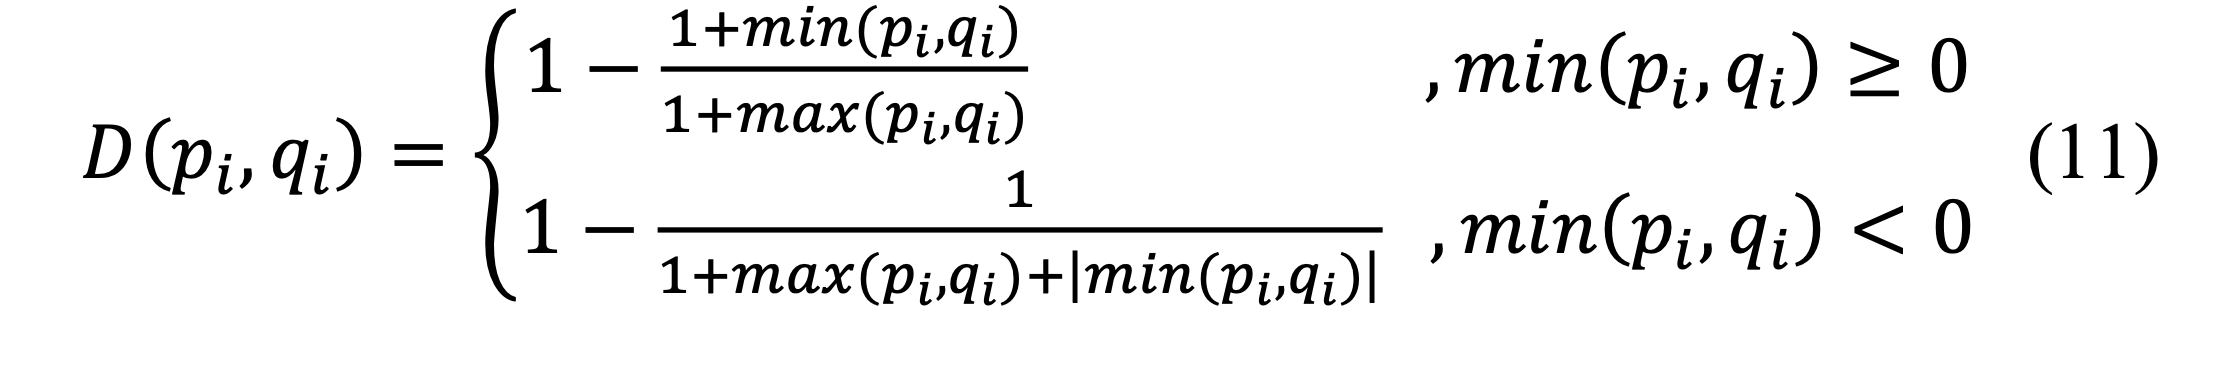
<i > Hassanat distance metric formula [1] </i><br>

## Result
<p>
All experiments took place with cross-validation. There is improvement in two trials with respect to the cross-validation score over the entire dataset.In the last trial, there was a decrease in performance.</p><br>

<span style="color:#e74c3c;"> Trial 1 </span> Breast Cancer Wisconsin Dataset <br>
<span style="color:#e74c3c;"> Trial 2 </span> Wine Quality Dataset <br>
<span style="color:#e74c3c;"> Trial 3 </span> Iris Dataset
<br>
<br>

|         	| Minkowski 	| Hassanat 	| Improvement 	|
|---------	|-----------	|----------	|-------------	|
| Trial 1 	| 90.857 %  	| 94.908 % 	| +4.051 %    	|
| Trial 2 	| 44.620 %  	| 50.480 % 	| +5.86 %     	|
| Trial 3 	| 96.667 %  	| 95.333 % 	| -1.334 %    	|




## Reference 
[1] https://doi.org/10.1109/ETCEA57049.2022.10009844

In [1]:
# Importing dependencies

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [2]:
# Reading data and cleaning redundant columns

data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
data.drop(['id', 'Unnamed: 32'] , axis=1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Seperating into data features and target

y = data['diagnosis']
X = data.iloc[:,1:-1]


# Encoding classes

lb = LabelEncoder()
y = lb.fit_transform(y)


print(X.shape)
print(np.unique(y))

(569, 29)
[0 1]


# <span style="color:#e74c3c;"> Hassanat Distance Metric </span> Implementation

In [4]:
# Implementation for sklearn

def hassanat_dist_metric(df1, df2):
    dist_list = []
    total = 0
    
    for x in range(len(df1)):
        data1 = np.array(df1)[x]
        data2 = np.array(df2)[x]
        
        min_ = min(data1, data2)
        max_ = max(data1, data2)
        
        if min_ >= 0:
            dist = 1-( (1+min_)/(1+max_) )
            dist_list.append(dist)

        else:
            dist = 1-( (1+min_ + np.abs(min_))/(1+max_+np.abs(min_) ) )
            dist_list.append(dist)
    
    total = np.sum(dist_list)
    return total

In [5]:
# Implementation for dataframe using 1 neigbor

def hassanat_dist_dataframe(train_data, target ,query_point_i, n_neighbors = 1):
    dist_list = []
    dist_class = []
    for i in range(train_data.shape[0]):
        if query_point_i != i:
            dist = hassanat_dist_metric(train_data.iloc[query_point_i], train_data.iloc[i])
            dist_list.append(dist)
            dist_class.append(target[i])
        else:
            pass
    
    n = pd.DataFrame(dist_list , columns = ['dist'])
    n['dist_class'] = dist_class
    n = n.sort_values(by=['dist']).head(n_neighbors)
    
    result = n.iloc[0,n_neighbors]
    
    return result


# Apllication without sklearn

pred_hassanat_df = []

for i in range(X.shape[0]):
    pred_hassanat_df.append(hassanat_dist_dataframe(train_data = X, query_point_i = i , target = y))
    
print(r2_score(y, pred_hassanat_df))

0.736866444691084


# <span style="color:#e74c3c;"> Trial 1 </span> Breast Cancer Wisconsin Dataset

In [6]:
#  KNN with Minkowski Distance

minkowski_model = KNeighborsClassifier(n_neighbors = 2, metric= 'minkowski')

minkowski_model_cv_score = cross_val_score(minkowski_model, X, y, cv = 5, n_jobs=-1)

print('Minkowski CV Score: {0:.03f} %'.format( np.mean(minkowski_model_cv_score) * 100))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Minkowski CV Score: 90.857 %


In [7]:
# KNN with Hassanat Distance

hassanat_model = KNeighborsClassifier(n_neighbors = 2, metric= hassanat_dist_metric)

hassanat_model_cv_score = cross_val_score(hassanat_model, X, y, cv = 5, n_jobs=-1)

print('Hassanat CV Score: {0:.03f} %'.format( np.mean(hassanat_model_cv_score) * 100))

Hassanat CV Score: 94.908 %


# <span style="color:#e74c3c;"> Trial 2 </span> Wine Quality Dataset

In [8]:
# Reading data and cleaning redundant columns

data2 = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

data2.drop(['Id'] , axis=1, inplace = True)

# Seperating into data features and target

y = data2['quality']
X = data2.iloc[:,0:-1]

print(X.shape)
print(np.unique(y))

(1143, 11)
[3 4 5 6 7 8]


In [9]:
#  KNN with Minkowski Distance

minkowski_model = KNeighborsClassifier(n_neighbors = 6, metric= 'minkowski')

minkowski_model_cv_score = cross_val_score(minkowski_model, X, y, cv = 5, n_jobs=-1)

print('Minkowski CV Score: {0:.03f} %'.format( np.mean(minkowski_model_cv_score) * 100))

Minkowski CV Score: 44.620 %


In [10]:
# KNN with Hassanat Distance

hassanat_model = KNeighborsClassifier(n_neighbors = 6, metric= hassanat_dist_metric)

hassanat_model_cv_score = cross_val_score(hassanat_model, X, y, cv = 5, n_jobs=-1)

print('Hassanat CV Score: {0:.03f} %'.format( np.mean(hassanat_model_cv_score) * 100))

Hassanat CV Score: 50.480 %


# <span style="color:#e74c3c;"> Trial 3 </span> Iris Dataset

In [11]:
# Reading data and cleaning redundant columns

data3 = pd.read_csv('/kaggle/input/iris/Iris.csv')

data3.drop(['Id'] , axis=1, inplace = True)

# Seperating into data features and target

y = data3['Species']
X = data3.iloc[:,0:-1]

# Encoding classes

lb = LabelEncoder()
y = lb.fit_transform(y)


print(X.shape)
print(np.unique(y))

(150, 4)
[0 1 2]


In [12]:
#  KNN with Minkowski Distance

minkowski_model = KNeighborsClassifier(n_neighbors = 3, metric= 'minkowski')

minkowski_model_cv_score = cross_val_score(minkowski_model, X, y, cv = 5, n_jobs=-1)

print('Minkowski CV Score: {0:.03f} %'.format( np.mean(minkowski_model_cv_score) * 100))

Minkowski CV Score: 96.667 %


In [13]:
# KNN with Hassanat Distance

hassanat_model = KNeighborsClassifier(n_neighbors = 3, metric= hassanat_dist_metric)

hassanat_model_cv_score = cross_val_score(hassanat_model, X, y, cv = 5, n_jobs=-1)

print('Hassanat CV Score: {0:.03f} %'.format( np.mean(hassanat_model_cv_score) * 100))

Hassanat CV Score: 95.333 %
